In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pymysql
import sys
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import json

database information

In [3]:
# USER = "group13"
# PASSWORD = "123456789"
# HOST = "dublinbikegroup13.c1msfserw61n.us-east-1.rds.amazonaws.com"
# PORT = 3306
# DATABASE = "dbbike13"

HOST = "127.0.0.1"
USER = "root"
PORT = 3306
DATABASE = "dbbike13"
PASSWORD = "qweqweqwe"

connect to database

In [4]:
try:
    engine = create_engine("mysql+pymysql://{}:{}@{}:{}/{}".format(USER, PASSWORD, HOST, PORT, DATABASE), echo=True)
    
except Exception as e:
        sys.exit(e)

In [5]:
df_availability = pd.read_sql_table("availability",engine)
df_weather = pd.read_sql_table("weather", engine)

2023-04-12 20:54:34,279 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-04-12 20:54:34,281 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-12 20:54:34,282 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-04-12 20:54:34,282 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-12 20:54:34,284 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-04-12 20:54:34,284 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-12 20:54:34,286 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2023-04-12 20:54:34,286 INFO sqlalchemy.engine.Engine [generated in 0.00041s] {'table_schema': 'dbbike13', 'table_name': 'availability'}
2023-04-12 20:54:34,305 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `availability`
2023-04-12 20:54:34,306 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-12 20:54:34,315 INFO sqlalchemy.engine.Engine SELECT availability.number, availability.last_update,

In [6]:
df_availability['datetime_rounded'] = pd.to_datetime(df_availability['last_update']).dt.round('10min')
df_availability

,number,last_update,available_bike_stands,available_bikes,status,datetime_rounded
0,1,2023-03-03 15:16:39,23,8,OPEN,2023-03-03 15:20:00
1,1,2023-03-05 16:03:11,1,29,OPEN,2023-03-05 16:00:00
2,1,2023-03-05 16:08:24,0,30,OPEN,2023-03-05 16:10:00
3,1,2023-03-05 16:49:05,1,29,OPEN,2023-03-05 16:50:00
4,1,2023-03-05 17:11:26,1,29,OPEN,2023-03-05 17:10:00
...,...,...,...,...,...,...
105408,117,2023-04-10 23:01:00,40,0,OPEN,2023-04-10 23:00:00
105409,117,2023-04-10 23:21:08,40,0,OPEN,2023-04-10 23:20:00
105410,117,2023-04-10 23:31:12,40,0,OPEN,2023-04-10 23:30:00
105411,117,2023-04-11 16:58:59,40,0,OPEN,2023-04-11 17:00:00


In [7]:
df_weather['datetime_rounded'] = pd.to_datetime(df_weather['dt']).dt.round('10min')

In [8]:
df_weather

,dt,Clouds,feels_like,humidity,pressure,temp,temp_max,temp_min,sunrise,sunset,visibility,weather_description,weather_main,wind_deg,wind_speed,icon,datetime_rounded
0,2023-03-05 16:41:14,40,279.77,69,1016,282.42,282.80,281.68,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,scattered clouds,Clouds,280,5.14,None,2023-03-05 16:40:00
1,2023-03-05 16:57:03,75,279.55,71,1016,282.08,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None,2023-03-05 17:00:00
2,2023-03-05 17:07:41,75,279.64,71,1015,282.15,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None,2023-03-05 17:10:00
3,2023-03-05 17:15:00,75,279.64,71,1015,282.15,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None,2023-03-05 17:20:00
4,2023-03-05 17:17:09,75,279.03,72,1015,281.98,282.59,280.91,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,280,5.66,None,2023-03-05 17:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2023-04-10 00:46:51,75,283.35,86,1005,283.97,284.68,283.51,2023-04-10 06:37:53,2023-04-10 20:14:39,8000,broken clouds,Clouds,210,7.20,04n,2023-04-10 00:50:00
1187,2023-04-10 22:57:25,40,274.27,80,1007,279.26,280.36,278.51,2023-04-10 06:37:53,2023-04-10 20:14:39,10000,scattered clouds,Clouds,250,9.77,03n,2023-04-10 23:00:00
1188,2023-04-10 23:18:29,40,275.25,81,1007,279.15,279.47,278.51,2023-04-10 06:37:53,2023-04-10 20:14:39,10000,scattered clouds,Clouds,250,6.17,03n,2023-04-10 23:20:00
1189,2023-04-10 23:27:32,40,275.25,81,1007,279.15,279.47,278.51,2023-04-10 06:37:53,2023-04-10 20:14:39,10000,scattered clouds,Clouds,250,6.17,03n,2023-04-10 23:30:00


In [9]:
df_merged = pd.merge(df_availability, df_weather, on='datetime_rounded')

In [10]:
df_merged

,number,last_update,available_bike_stands,available_bikes,status,datetime_rounded,dt,Clouds,feels_like,humidity,...,temp_max,temp_min,sunrise,sunset,visibility,weather_description,weather_main,wind_deg,wind_speed,icon
0,1,2023-03-05 17:11:26,1,29,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
1,3,2023-03-05 17:08:32,1,19,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
2,4,2023-03-05 17:08:57,0,20,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
3,5,2023-03-05 17:13:10,39,1,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
4,6,2023-03-05 17:12:35,3,17,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153194,107,2023-03-25 10:05:15,28,12,OPEN,2023-03-25 10:10:00,2023-03-25 10:06:52,75,282.51,78,...,284.03,282.36,2023-03-25 06:16:23,2023-03-25 18:45:47,10000,broken clouds,Clouds,260,7.20,04d
153195,108,2023-03-25 10:05:47,26,9,OPEN,2023-03-25 10:10:00,2023-03-25 10:06:52,75,282.51,78,...,284.03,282.36,2023-03-25 06:16:23,2023-03-25 18:45:47,10000,broken clouds,Clouds,260,7.20,04d
153196,30,2023-03-23 14:54:35,20,0,OPEN,2023-03-23 14:50:00,2023-03-23 14:53:37,40,285.71,61,...,287.25,285.36,2023-03-23 06:21:15,2023-03-23 18:42:11,10000,scattered clouds,Clouds,210,12.86,03d
153197,42,2023-03-23 14:52:36,28,2,OPEN,2023-03-23 14:50:00,2023-03-23 14:53:37,40,285.71,61,...,287.25,285.36,2023-03-23 06:21:15,2023-03-23 18:42:11,10000,scattered clouds,Clouds,210,12.86,03d


In [11]:
df_whole = df_merged[['number', 'datetime_rounded','available_bike_stands','available_bikes','feels_like','humidity','pressure','weather_main',  'wind_speed' ]]

In [12]:
df_whole

,number,datetime_rounded,available_bike_stands,available_bikes,feels_like,humidity,pressure,weather_main,wind_speed
0,1,2023-03-05 17:10:00,1,29,279.64,71,1015,Clouds,4.63
1,3,2023-03-05 17:10:00,1,19,279.64,71,1015,Clouds,4.63
2,4,2023-03-05 17:10:00,0,20,279.64,71,1015,Clouds,4.63
3,5,2023-03-05 17:10:00,39,1,279.64,71,1015,Clouds,4.63
4,6,2023-03-05 17:10:00,3,17,279.64,71,1015,Clouds,4.63
...,...,...,...,...,...,...,...,...,...
153194,107,2023-03-25 10:10:00,28,12,282.51,78,1002,Clouds,7.20
153195,108,2023-03-25 10:10:00,26,9,282.51,78,1002,Clouds,7.20
153196,30,2023-03-23 14:50:00,20,0,285.71,61,987,Clouds,12.86
153197,42,2023-03-23 14:50:00,28,2,285.71,61,987,Clouds,12.86


In [13]:
df_whole.loc[:, 'day_of_week'] = df_whole['datetime_rounded'].dt.dayofweek
df_whole.loc[:, 'hourly'] = df_whole['datetime_rounded'].dt.hour

C:\Users\Guo.000\AppData\Local\Temp\ipykernel_33212\136827754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole.loc[:, 'day_of_week'] = df_whole['datetime_rounded'].dt.dayofweek
C:\Users\Guo.000\AppData\Local\Temp\ipykernel_33212\136827754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole.loc[:, 'hourly'] = df_whole['datetime_rounded'].dt.hour


In [14]:
print(df_whole['weather_main'].unique())

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "weather_main" feature
df_whole.loc[:,'weather_main_value'] = le.fit_transform(df_whole['weather_main'])

print(df_whole['weather_main_value'].unique())

['Clouds' 'Drizzle' 'Rain' 'Clear' 'Snow' 'Mist']
[1 2 4 0 5 3]


C:\Users\Guo.000\AppData\Local\Temp\ipykernel_33212\1776046408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole.loc[:,'weather_main_value'] = le.fit_transform(df_whole['weather_main'])


In [15]:
df_whole['datetime_numeric'] = (df_whole['datetime_rounded'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

C:\Users\Guo.000\AppData\Local\Temp\ipykernel_33212\2278473662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole['datetime_numeric'] = (df_whole['datetime_rounded'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')


In [16]:
df_whole.columns = df_whole.columns.astype(str)

In [17]:
df_whole

,number,datetime_rounded,available_bike_stands,available_bikes,feels_like,humidity,pressure,weather_main,wind_speed,day_of_week,hourly,weather_main_value,datetime_numeric
0,1,2023-03-05 17:10:00,1,29,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
1,3,2023-03-05 17:10:00,1,19,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
2,4,2023-03-05 17:10:00,0,20,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
3,5,2023-03-05 17:10:00,39,1,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
4,6,2023-03-05 17:10:00,3,17,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153194,107,2023-03-25 10:10:00,28,12,282.51,78,1002,Clouds,7.20,5,10,1,1679739000
153195,108,2023-03-25 10:10:00,26,9,282.51,78,1002,Clouds,7.20,5,10,1,1679739000
153196,30,2023-03-23 14:50:00,20,0,285.71,61,987,Clouds,12.86,3,14,1,1679583000
153197,42,2023-03-23 14:50:00,28,2,285.71,61,987,Clouds,12.86,3,14,1,1679583000


In [18]:
df_train, df_test = train_test_split(df_whole, test_size=0.3)
print("Train set size:", len(df_train))
print("Test set size:", len(df_test))

Train set size: 107239
Test set size: 45960


In [19]:
# Define the input features and target variables
input_features = ['number', 'feels_like', 'weather_main_value', 'wind_speed','humidity',
                  'pressure','day_of_week', 'hourly']

x_train = df_train[input_features]
y_train = df_train[['available_bike_stands', 'available_bikes']]

x_test = df_test[input_features]
y_test = df_test[['available_bike_stands', 'available_bikes']]

In [20]:
# Create a Random Forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=15
                                 ,random_state = 0
                                ,max_depth=27
                                ,max_features=7)

# Fit the model on the training data
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=27, max_features=7, n_estimators=15,
                      random_state=0)

In [21]:
# Make predictions on the test data
y_pred = rf.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print('Mean squared error:', mse)

Mean squared error: 2.2979422342802307


0.9768589719868137 29


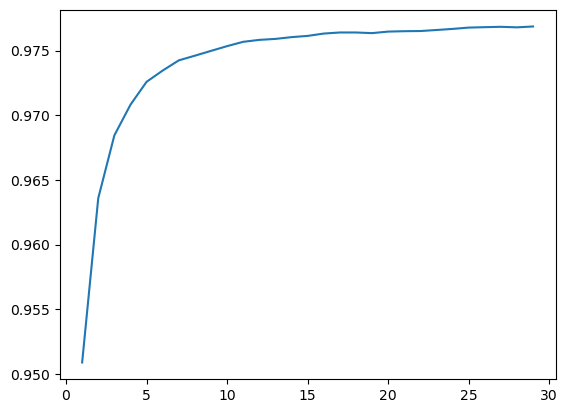

In [22]:
scorel = []
mi = 1
ma = 30
for i in range (mi,ma):
    rfc = RandomForestRegressor(n_estimators=i
                                 ,n_jobs=-1
                                 ,random_state = 0
                                )
    rfc = rfc.fit(x_train,y_train)
    score =rfc.score(x_test,y_test)
#     score = cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+mi)

plt.plot(range(mi,ma),scorel)
plt.show()

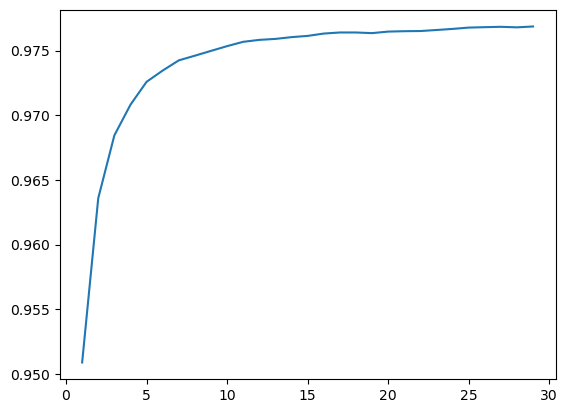

In [23]:
plt.plot(range(mi,ma),scorel)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 0.9765035692456465 29


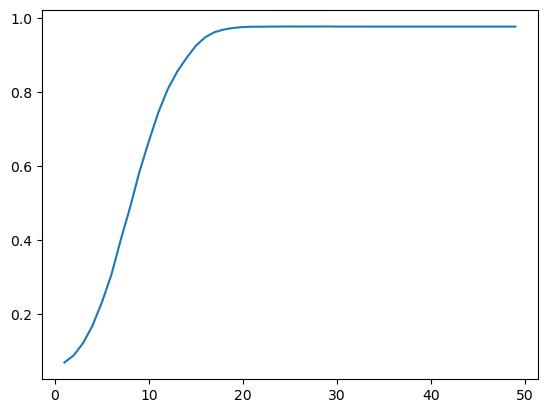

In [24]:
scorel = []
mi = 1
ma = 50
for i in range (mi,ma):
    print(i, end=' ')
    rfc = RandomForestRegressor(n_estimators=15
                                 ,n_jobs=-1
                                 ,random_state = 0
                                ,max_depth=i
                                )
    rfc = rfc.fit(x_train,y_train)
    score =rfc.score(x_test,y_test)
#     score = cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+mi)
plt.plot(range(mi,ma),scorel)
plt.show()

In [25]:
scorel = []
mi = 1
ma = 9
for i in range (mi,ma):
    print(i,end=' ')
    rfc = RandomForestRegressor(n_estimators=15
                                 ,random_state = 0
                                ,max_depth=27
                                ,max_features=i
                                )
    rfc = rfc.fit(x_train,y_train)
    score =rfc.score(x_test,y_test)
#     score = cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+mi)
plt.plot(range(mi,ma),scorel)
plt.show()

1 2 3 4 5 6 7 8 

KeyboardInterrupt: 

In [26]:
y_pred

array([[28.76666667, 11.23333333],
       [ 4.18592593, 35.81407407],
       [16.73333333, 23.26666667],
       ...,
       [30.        , 10.        ],
       [27.93333333,  1.06666667],
       [38.        ,  2.        ]])

In [27]:
y_test

,available_bike_stands,available_bikes
147410,18,21
26286,8,32
86457,16,24
39583,30,10
62674,33,0
...,...,...
10106,9,15
102537,18,7
106143,30,10
108677,28,1


In [28]:
df_whole

,number,datetime_rounded,available_bike_stands,available_bikes,feels_like,humidity,pressure,weather_main,wind_speed,day_of_week,hourly,weather_main_value,datetime_numeric
0,1,2023-03-05 17:10:00,1,29,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
1,3,2023-03-05 17:10:00,1,19,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
2,4,2023-03-05 17:10:00,0,20,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
3,5,2023-03-05 17:10:00,39,1,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
4,6,2023-03-05 17:10:00,3,17,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153194,107,2023-03-25 10:10:00,28,12,282.51,78,1002,Clouds,7.20,5,10,1,1679739000
153195,108,2023-03-25 10:10:00,26,9,282.51,78,1002,Clouds,7.20,5,10,1,1679739000
153196,30,2023-03-23 14:50:00,20,0,285.71,61,987,Clouds,12.86,3,14,1,1679583000
153197,42,2023-03-23 14:50:00,28,2,285.71,61,987,Clouds,12.86,3,14,1,1679583000


In [29]:
# Define the input features and target variables
input_features = ['feels_like', 'weather_main_value', 'wind_speed','humidity',
                  'pressure','day_of_week', 'hourly']

x_train = df_train[input_features]
y_train = df_train[['available_bike_stands', 'available_bikes']]

x_test = df_test[input_features]
y_test = df_test[['available_bike_stands', 'available_bikes']]

In [30]:
# create list for station model
rf_list = [0] * (len(df_whole['number'].unique())+10)

input_features = ['feels_like', 'weather_main_value', 'wind_speed','humidity',
                  'pressure','day_of_week', 'hourly']

# train for each station
for i in df_whole['number'].unique():
    print(i, end=' ')
    
    x_train = df_train[df_train['number'] == i][input_features]
    y_train = df_train[df_train['number'] == i][['available_bike_stands', 'available_bikes']]
        
    rf = RandomForestRegressor(
                                n_estimators=25
                                 ,random_state = 0
                                ,max_depth=27
                                ,max_features=6)
    rf.fit(x_train, y_train)
    
    rf_list[i] = rf
                

1 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 20 21 23 24 25 26 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 68 71 72 73 74 75 76 77 80 82 83 84 85 86 87 88 89 90 91 92 96 97 98 99 100 101 102 103 104 105 106 108 111 112 113 114 115 116 117 2 16 19 22 27 28 57 66 67 69 78 79 93 94 95 107 109 110 

In [31]:
len(df_whole['number'].unique())

114

In [32]:
mse_sum = 0
new_train_list = []
for i in df_whole['number'].unique():
    print(i, end=' ')
    
    x_test = df_test[df_test['number'] == i][input_features]                   
    y_test = df_test[df_test['number'] == i][['available_bike_stands', 'available_bikes']]
    
    # Make predictions on the test data
    y_pred = rf_list[i].predict(x_test)
#     print(y_pred.head(5))
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
#     print(y_pred.head(5))
    mse_sum += mse

    print('Mean squared error:', mse)
    if mse > 3:
        new_train_list += [i, ]


1 Mean squared error: 2.176483078658353
3 Mean squared error: 0.8560439411001912
4 Mean squared error: 1.4611027153320073
5 Mean squared error: 6.05772919118008
6 Mean squared error: 1.1996390332149338
7 Mean squared error: 1.2258753413646377
8 Mean squared error: 1.8683301189714543
9 Mean squared error: 2.0276564396478323
10 Mean squared error: 1.2679016265574505
11 Mean squared error: 0.9089903826745183
12 Mean squared error: 0.9851505433016681
13 Mean squared error: 0.893966011559723
14 Mean squared error: 3.9364971165573626
15 Mean squared error: 0.49189084822743506
17 Mean squared error: 0.7249738255168683
18 Mean squared error: 1.5203453071092121
20 Mean squared error: 2.5461427128106426
21 Mean squared error: 3.6816485194342157
23 Mean squared error: 2.153030427872327
24 Mean squared error: 1.5428165365901263
25 Mean squared error: 0.8936417723423666
26 Mean squared error: 0.9875525772087155
29 Mean squared error: 4.290789608886687
30 Mean squared error: 2.0112970643947214
31 Me

In [33]:
mse_sum / len(df_whole['number'].unique())

2.189143956322052

In [34]:
for i in new_train_list:
    print(i, end=' ')
    
    x_train = df_train[df_train['number'] == i][input_features]
    y_train = df_train[df_train['number'] == i][['available_bike_stands', 'available_bikes']]
        
    rf = RandomForestRegressor(n_estimators=50
                                 ,random_state = 0
                                ,max_depth=27
                                ,max_features=6)
    rf.fit(x_train, y_train)
    
    rf_list[i] = rf

for i in new_train_list:
    print(i, end=' ')
    
    x_test = df_test[df_test['number'] == i][input_features]                   
    y_test = df_test[df_test['number'] == i][['available_bike_stands', 'available_bikes']]
    
    # Make predictions on the test data
    y_pred = rf_list[i].predict(x_test)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print('Mean squared error:', mse)

5 14 21 29 32 33 34 45 50 56 58 62 65 68 72 75 76 77 86 92 97 106 112 114 28 66 69 78 93 107 5 Mean squared error: 5.5148981244779005
14 Mean squared error: 3.826190836130263
21 Mean squared error: 3.7007497479813076
29 Mean squared error: 4.321848378207707
32 Mean squared error: 3.3001794824744293
33 Mean squared error: 3.8530501668409247
34 Mean squared error: 6.060446873260415
45 Mean squared error: 2.9635052465750626
50 Mean squared error: 3.8421000131230727
56 Mean squared error: 3.388917642755427
58 Mean squared error: 4.920423863079119
62 Mean squared error: 5.201165402108675
65 Mean squared error: 3.668145054288924
68 Mean squared error: 4.4473279015385
72 Mean squared error: 3.2616206145815583
75 Mean squared error: 8.592218141106706
76 Mean squared error: 3.4638692345438757
77 Mean squared error: 3.9268376627246777
86 Mean squared error: 3.8871295053536077
92 Mean squared error: 3.316314144584621
97 Mean squared error: 2.9526103567505686
106 Mean squared error: 3.761294919448

In [35]:
import pickle

for i in df_whole['number'].unique():
    with open('station_'+str(i)+'.pkl','wb') as handle:
        pickle.dump(rf_list[i], handle, pickle.HIGHEST_PROTOCOL)

In [44]:
y_pred = rf_list[75].predict([[278, 1, 9, 80, 993, 2, 2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
y_pred

array([[32.06,  7.94]])